# Logistic regression to classify flowers

#### DAHAMOU Abdelilah

In [83]:
# Importing pandas and numpy and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns    
from  sklearn import  datasets

In [84]:
# Reading the csv file into a pandas DataFrame
iris=datasets.load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])

In [85]:
data.target.unique()

array([0., 1., 2.])

In [130]:
# Separate data
data1 = data[data['target'].isin([0,1])]
data2 = data[data['target'].isin([1,2])]

In [87]:
data1.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [88]:
data2.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
55,5.7,2.8,4.5,1.3,1.0
56,6.3,3.3,4.7,1.6,1.0
57,4.9,2.4,3.3,1.0,1.0
58,6.6,2.9,4.6,1.3,1.0
59,5.2,2.7,3.9,1.4,1.0


In [89]:
#Divide the data into two parts
#data1 for target0 and target1
data1 = data1[['petal length (cm)', 'petal width (cm)', 'target']]
#data2 for target1 and target2
data2 = data2[['petal length (cm)', 'petal width (cm)', 'target']]

In [90]:
data1.head(3)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0


In [91]:
print(data1.shape)
print(data2.shape)

(100, 3)
(100, 3)


## Target

In [92]:
data1['target'].value_counts()


0.0    50
1.0    50
Name: target, dtype: int64

In [93]:
data2['target'].value_counts()


1.0    50
2.0    50
Name: target, dtype: int64

## Features

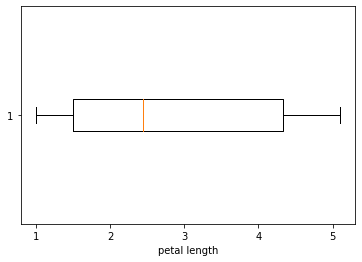

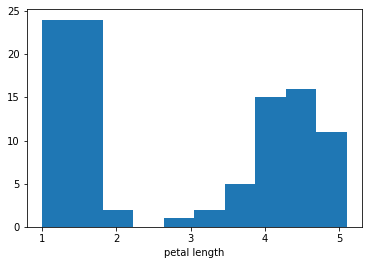

In [94]:

# Start with petal length for data1

# boxplot 
plt.boxplot(data1['petal length (cm)'], vert=False)
plt.xlabel('petal length')
plt.show()

# histogram 
plt.hist(data1['petal length (cm)'])
plt.xlabel('petal length')
plt.show()

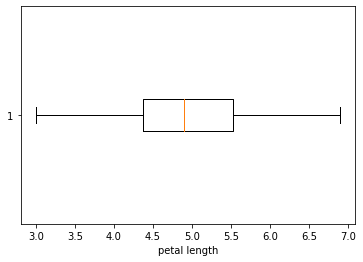

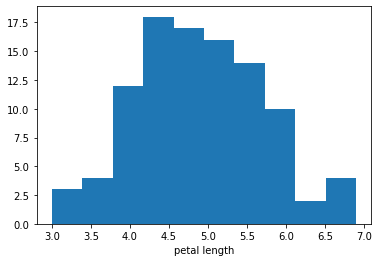

In [95]:
#start with petal length for data2

# boxplot 
plt.boxplot(data2['petal length (cm)'], vert=False)
plt.xlabel('petal length')
plt.show()

# histogram 
plt.hist(data2['petal length (cm)'])
plt.xlabel('petal length')
plt.show()

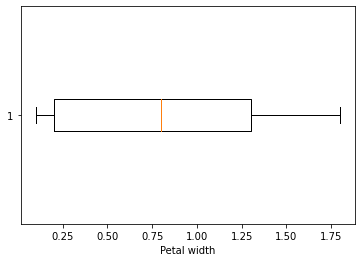

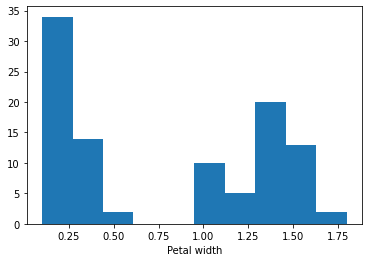

In [96]:
# petal width for data1

# boxplot 
plt.boxplot(data1['petal width (cm)'], vert=False)
plt.xlabel('Petal width')
plt.show()

# histogram 
plt.hist(data1['petal width (cm)'])
plt.xlabel('Petal width')
plt.show()

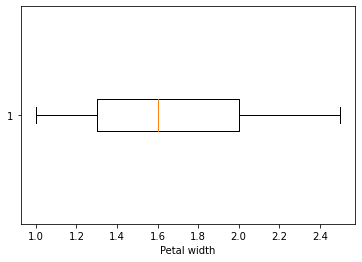

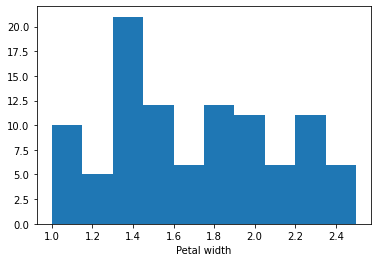

In [97]:
# petal width for data2

# boxplot 
plt.boxplot(data2['petal width (cm)'], vert=False)
plt.xlabel('Petal width')
plt.show()

# histogram 
plt.hist(data2['petal width (cm)'])
plt.xlabel('Petal width')
plt.show()

### Relation betwen features and target

In [98]:
data1.head(3)

,petal length (cm),petal width (cm),target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0


C:\Users\HP\AppData\Local\Temp\ipykernel_18180\953696666.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_0 = data1[data.target == 0]
C:\Users\HP\AppData\Local\Temp\ipykernel_18180\953696666.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_1 = data1[data.target == 1]
C:\Users\HP\AppData\Local\Temp\ipykernel_18180\953696666.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_2 = data2[data.target == 2]


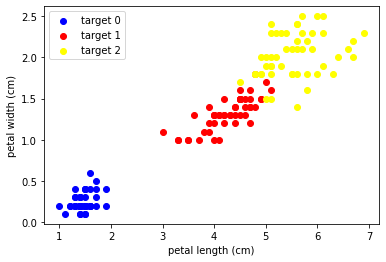

In [99]:
# for target 0 
target_0 = data1[data.target == 0]
plt.scatter(target_0['petal length (cm)'], target_0['petal width (cm)'], color='blue', label='target 0')

# for target 1 
target_1 = data1[data.target == 1]
plt.scatter(target_1['petal length (cm)'], target_1['petal width (cm)'], color='red', label='target 1')

# for target 2 
target_2 = data2[data.target == 2]
plt.scatter(target_2['petal length (cm)'], target_2['petal width (cm)'], color='yellow', label='target 2')


plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

## Randomize data 

In [100]:
data1 = data1.sample(frac=1, random_state = 42)
data2 = data2.sample(frac=1, random_state = 42)

### Separate data to train and test

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
data1_train, data1_test = train_test_split(data1, test_size=0.2)
data2_train, data2_test = train_test_split(data2, test_size=0.2)

In [103]:
print(data1.shape)

(100, 3)


In [104]:
print(data2_train.shape)

(80, 3)


In [105]:
print(data2_test.shape)

(20, 3)


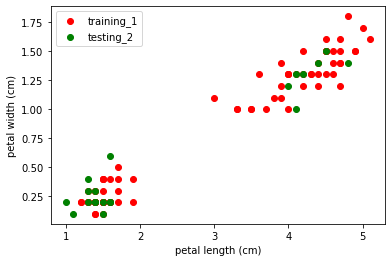

In [106]:
plt.scatter(data1_train['petal length (cm)'], data1_train['petal width (cm)'], color='red', label='training_1')
plt.scatter(data1_test['petal length (cm)'], data1_test['petal width (cm)'], color='green', label='testing_2')

plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

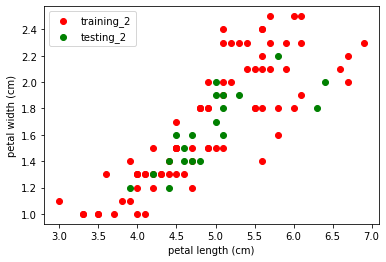

In [107]:
plt.scatter(data2_train['petal length (cm)'], data2_train['petal width (cm)'], color='red', label='training_2')
plt.scatter(data2_test['petal length (cm)'], data2_test['petal width (cm)'], color='green', label='testing_2')

plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

### Train logistic regression 

In [108]:
X1_train = data1_train[['petal length (cm)', 'petal width (cm)']]
y1_train = data1_train['target']


X1_test = data1_test[['petal length (cm)', 'petal width (cm)']]
y1_test = data1_test['target']

In [109]:
X2_train = data2_train[['petal length (cm)', 'petal width (cm)']]
y2_train = data2_train['target']


X2_test = data2_test[['petal length (cm)', 'petal width (cm)']]
y2_test = data2_test['target']

In [110]:
from sklearn.linear_model import LogisticRegression
logisticRegr1 = LogisticRegression()
logisticRegr1.fit(X1_train, y1_train)

LogisticRegression()

In [111]:
from sklearn.linear_model import LogisticRegression
logisticRegr2 = LogisticRegression()
logisticRegr2.fit(X2_train, y2_train)

LogisticRegression()

### Logistic regression  

Formule of logistic regression 
1) Classification betwen target 1 and target 0
$$p(y=1|x; \theta) = \frac{1}{1 + e^{\theta_0 + \theta_1 x_1 + \theta_2 x_2}}$$

Donc
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = log(\frac{p}{1-p})$$

D'ou
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ 

Alors
$$x_2 = \frac{1}{\theta_2} (\theta_0 + \theta_1 x_1)$$ 
2) Classification betwen target 2 and target 1
$$p(y=1|x; \theta) = \frac{1}{1 + e^{\theta_{01} + \theta_1 x_3 + \theta_{21} x_2}}$$

Donc
$$\theta_{01} + \theta_3 x_3 + \theta_{21} x_2 = log(\frac{p}{1-p})$$

D'ou
$$\theta_{01} + \theta_3 x_3 + \theta_{21} x_2 = 0$$ 

Alors
$$x_3 = \frac{1}{\theta_3} (\theta_{01} + \theta_{21} x_2)$$ 

In [112]:
logisticRegr1.coef_

array([[2.46549457, 1.0409546 ]])

In [113]:
logisticRegr2.coef_

array([[2.66681978, 2.03782773]])

In [114]:
logisticRegr1.intercept_

array([-7.39797791])

In [115]:
logisticRegr2.intercept_

array([-16.19649491])

In [116]:
theta_0 = logisticRegr1.intercept_[0]
theta_1 = logisticRegr1.coef_[0, 0]
theta_2 = logisticRegr1.coef_[0, 1]
theta_01 = logisticRegr2.intercept_[0]
theta_21 = logisticRegr2.coef_[0, 0]
theta_3 = logisticRegr2.coef_[0, 1]

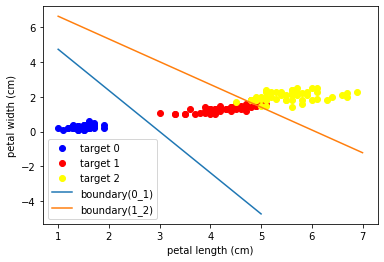

In [117]:

def decision_boundary(theta_0, theta_1, theta_2, l_x):
    return 1 / theta_2 * (-theta_0 -theta_1 * l_x)

# target = 0 
target_0 = data1[data1.target == 0]
plt.scatter(target_0['petal length (cm)'], target_0['petal width (cm)'], color='blue', label='target 0')

target_1 = data2[data2.target == 1]
plt.scatter(target_1['petal length (cm)'], target_1['petal width (cm)'], color='red', label='target 1')
#target 1 
target_2 = data2[data2.target == 2]
plt.scatter(target_2['petal length (cm)'], target_2['petal width (cm)'], color='yellow', label='target 2') 

l_x1 = np.linspace(1, 5)
l_x2 = np.linspace(1, 7)
l_y = decision_boundary(theta_0, theta_1, theta_2, l_x1)
l_z = decision_boundary(theta_01, theta_21, theta_3, l_x2)
plt.plot(l_x1, l_y, label='boundary(0_1)')
plt.plot(l_x2,l_z, label='boundary(1_2)')
plt.legend()
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

#### Confusion Matrix 



[<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg">]

In [118]:
y1_pred = logisticRegr1.predict(X1_test)

print('predictions: {}'.format(y1_pred))
print('true: {}'.format(list(y1_test.astype(int))))

predictions: [1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
true: [1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [119]:
y2_pred = logisticRegr1.predict(X2_test)

print('predictions: {}'.format(y2_pred))
print('true: {}'.format(list(y2_test.astype(int))))

predictions: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
true: [1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1]


In [120]:
from sklearn.metrics import confusion_matrix
# confusion matrix 
cm1 = confusion_matrix(y_true=y1_test, y_pred=y1_pred)
cm2 = confusion_matrix(y_true=y2_test, y_pred=y2_pred)



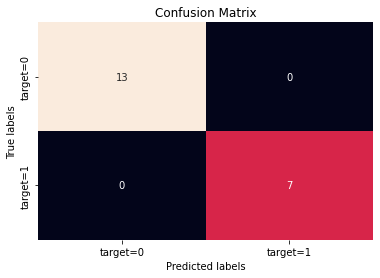

In [121]:
 
ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax, cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=0', 'target=1'])
ax.yaxis.set_ticklabels(['target=0', 'target=1'])
plt.show()

In [122]:
# true negative 
TN1 = 12
# true positive 
TP1 = 8
# false negative 
FN1 = 0 
# false positive 
FP1 = 0

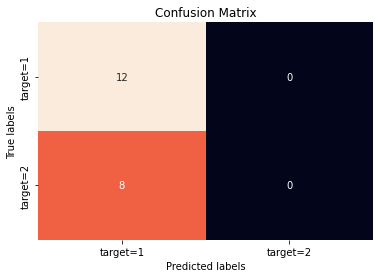

In [123]:
ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax, cbar=False)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['target=1', 'target=2'])
ax.yaxis.set_ticklabels(['target=1', 'target=2'])
plt.show()

In [124]:
# true negative 
TN2 = 12
# true positive 
TP2 = 0
# false negative 
FN2 = 8 
# false positive 
FP2 = 0

#### Accuracy 

In [125]:
accuracy1 = (TN1 + TP1) / (TN1 + TP1 + FP1 + FN1) * 100
print(accuracy1, '%')

100.0 %


#### Precision 

In [126]:
precision1 = TP1 / (TP1 + FP1) * 100
print(precision1, '%')

100.0 %


#### Recall 


In [127]:
recall1 = TP1 / (TP1 + FN1) * 100
print(recall1, '%')

100.0 %


In [128]:
accuracy2 = (TN2 + TP2) / (TN2 + TP2 + FP2 + FN2) * 100
print(accuracy2, '%')
recall2 = TP2 / (TP2 + FN2) * 100
print(recall2, '%')

60.0 %
0.0 %


## FIN